In [703]:
import json

# load in continuous time series data

ax_u1, ay_u1, az_u1, total_u1, gx_u1, gy_u1, gz_u1 = [], [], [], [], [], [], []

u1_dir = "testData/newGaitsO/"

for fileno in range(1, 10):
    for arr, fname in zip([ax_u1, ay_u1, az_u1, total_u1, gx_u1, gy_u1, gz_u1],
                          ["ax_array", "ay_array", "az_array", "totalsqr_array", "gx_array",
                           "gy_array", "gz_array"]):
        with open(f'{u1_dir}{fileno}/{fname}{fileno}.txt') as f:
            arr.extend(json.load(f))

time_millis_u1 = [ i*20 for i in range(0, len(ax_u1)) ]

ax_u2, ay_u2, az_u2, total_u2, gx_u2, gy_u2, gz_u2 = [], [], [], [], [], [], []
u2_fileno = 2
u2_dir = 'testData/newGaitsH/'
for fileno in range(1, 10):
    for arr, fname in zip([ax_u2, ay_u2, az_u2, total_u2, gx_u2, gy_u2, gz_u2],
                          ["ax_array", "ay_array", "az_array", "total_array", "gx_array",
                           "gy_array", "gz_array"]):
        with open(f'{u2_dir}{fileno}/{fname}{fileno}.txt') as f:
            arr.extend(json.load(f))
    
time_millis_u2 = [ i*20 for i in range(0, len(ax_u2)) ]

# check u1 lengths match up
assert(len(ax_u1) == len(ay_u1) and len(ay_u1) == len(az_u1) and len(az_u1) == len(time_millis_u1)
       and len(time_millis_u1) == len(total_u1))
assert(len(ax_u1) == len(gx_u1) and len(gx_u1) == len(gy_u1) and len(gy_u1) == len(gz_u1))

# check u2 lengths match up
assert(len(ax_u2) == len(ay_u2) and len(ay_u2) == len(az_u2) and len(az_u2) == len(time_millis_u2)
       and len(time_millis_u2) == len(total_u2))
assert(len(ax_u2) == len(gx_u2) and len(gx_u2) == len(gy_u2) and len(gy_u2) == len(gz_u2))


print(f"len(a?_u1) = {len(ax_u1)}")
print(f"len(a?_u2) = {len(ax_u2)}")

# time_scale is the no. of milliseconds between readings
time_scale = 20

len(a?_u1) = 4619
len(a?_u2) = 6763


In [704]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from sklearn.preprocessing import normalize

In [705]:
b, a = butter(4, [2, 20], 'bandpass', fs=50)

def bandfilter(ax, ay, az):
    b, a = butter(3, [0.5, 20], 'bandpass', fs=50)
    ax_f, ay_f, az_f = lfilter(b, a, ax) , lfilter(b, a, ay), lfilter(b, a, az)
    return ax_f, ay_f, az_f

ax_u1_f, ay_u1_f, az_u1_f = bandfilter(ax_u1, ay_u1, az_u1)
ax_u2_f, ay_u2_f, az_u2_f = bandfilter(ax_u2, ay_u2, az_u2)

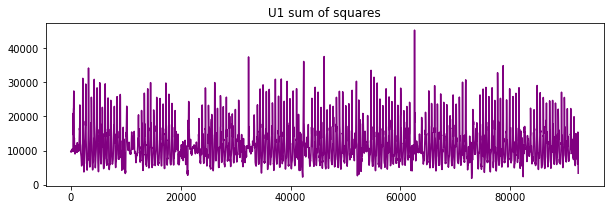

In [677]:
plt.plot(time_millis_u1, total_u1, color='purple')
plt.title('U1 sum of squares')
plt.show()

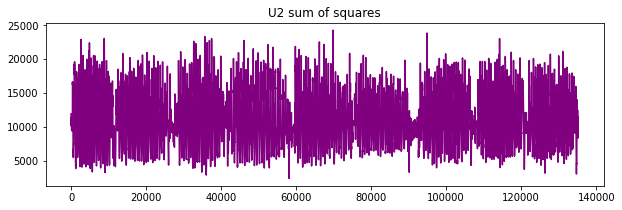

In [706]:
plt.plot(time_millis_u2, total_u2, color='purple')
plt.title('U2 sum of squares')
plt.show()

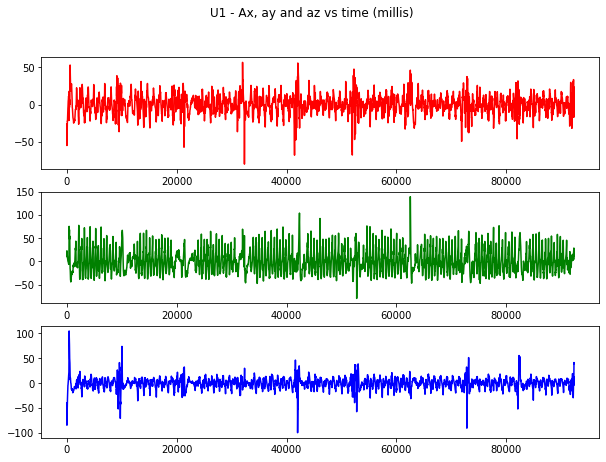

In [707]:


def plot_data(ax, ay, az, time_millis, title='Ax, ay and az'):
    fig, axs = plt.subplots(3, figsize=(10,7))
    fig.suptitle(title)
    axs[0].plot(time_millis, ax, color="red")
    axs[1].plot(time_millis, ay, color="green")
    axs[2].plot(time_millis, az, color="blue")
    plt.show()

plot_data(ax_u1_f, ay_u1_f, az_u1_f, time_millis_u1, title='U1 - Ax, ay and az vs time (millis)')

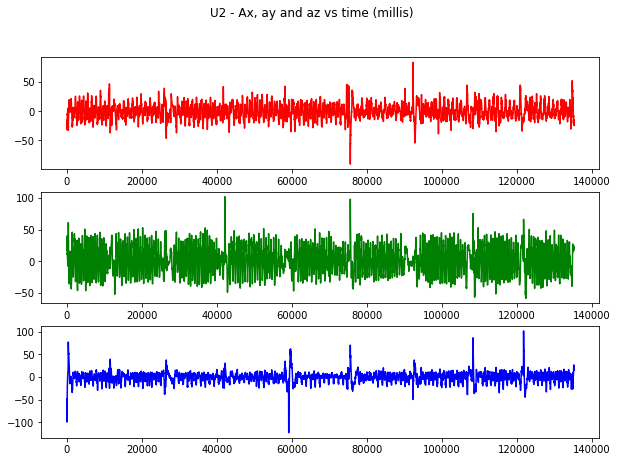

In [708]:
plot_data(ax_u2_f, ay_u2_f, az_u2_f, time_millis_u2,title='U2 - Ax, ay and az vs time (millis)')

In [709]:

# we get abt 4% better accuracy by giving each axis a mean of 0
def transform(ax, ay, az):
    ax = ax - np.mean(ax)
    ay = ay - np.mean(ay)
    az = az - np.mean(az)
    return ax, ay, az

# ax_u1_f, ay_u1_f, az_u1_f = transform(ax_u1, ay_u1, az_u1)
# ax_u2_f, ay_u2_f, az_u2_f = transform(ax_u2, ay_u2, az_u2)

In [710]:
# step 1 - peak finding on the z-axis


def get_peaks(az, time_scale, time_millis, distance=600):
    az_mean = np.mean(az)
    peaks,_ = find_peaks(az, distance= distance/time_scale, height = az_mean + 10)
    plt.plot(time_millis, az, color="green", markevery=peaks, marker="o", label="points")
    plt.title("Az - peak finding")
    plt.rcParams["figure.figsize"] = (10, 3)
    print(f"peaks indices = {peaks}")
    print(f"peaks values = { [ round(az[peak],2) for peak in peaks ]}")
    return peaks
    

peaks indices = [  21   78  109  160  212  263  312  363  420  505  576  614  669  725
  781  811  864  921  954 1019 1072 1166 1225 1277 1309 1362 1415 1467
 1497 1527 1600 1664 1697 1749 1805 1861 1915 1968 2024 2054 2118 2190
 2223 2305 2356 2387 2418 2474 2530 2560 2632 2701 2732 2789 2838 2869
 2951 3003 3058 3127 3193 3225 3258 3311 3366 3423 3480 3565 3626 3659
 3724 3778 3834 3885 3935 3994 4052 4125 4185 4215 4245 4301 4358 4412
 4466 4519 4550 4616]
peaks values = [75.82, 28.84, 78.02, 72.7, 75.03, 71.23, 74.46, 55.97, 53.92, 67.31, 19.23, 37.66, 60.91, 67.27, 55.17, 47.18, 57.69, 50.87, 10.54, 25.26, 47.43, 24.46, 59.13, 47.6, 65.08, 59.79, 56.04, 32.52, 41.45, 51.22, 69.74, 16.89, 52.14, 58.33, 65.12, 66.77, 70.11, 74.49, 60.09, 56.79, 104.49, 40.67, 65.73, 92.83, 30.74, 50.66, 56.69, 61.1, 50.27, 51.48, 60.43, 35.32, 76.76, 60.31, 31.25, 67.4, 70.25, 60.79, 51.14, 139.93, 36.03, 32.2, 58.76, 55.57, 54.18, 49.73, 55.03, 66.51, 18.01, 65.23, 62.36, 57.07, 60.59, 73.52, 77.12

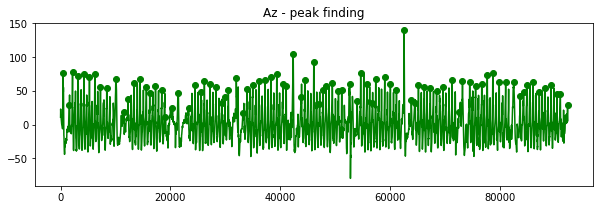

In [711]:
peaks_u1 = get_peaks(ay_u1_f, time_scale, time_millis_u1, distance=600)

peaks indices = [  20   72  104  160  208  239  272  320  378  442  493  532  566  601
  658  690  745  777  836  895  952 1011 1042 1097 1130 1189 1220 1251
 1324 1385 1461 1491 1522 1558 1604 1636 1689 1719 1753 1783 1814 1844
 1902 1932 1962 1995 2031 2065 2106 2163 2193 2232 2266 2298 2330 2362
 2395 2429 2462 2492 2528 2560 2592 2624 2657 2690 2723 2757 2789 2823
 2859 2907 2958 2988 3039 3069 3131 3189 3219 3250 3310 3370 3402 3462
 3493 3524 3556 3586 3628 3682 3713 3748 3779 3835 3866 3896 3926 3956
 4016 4048 4079 4112 4142 4173 4204 4234 4265 4324 4355 4386 4419 4452
 4511 4654 4714 4744 4801 4852 4883 4936 4994 5049 5106 5162 5219 5276
 5307 5356 5415 5483 5540 5596 5652 5707 5761 5814 5869 5926 5984 6015
 6055 6089 6165 6222 6278 6333 6389 6443 6500 6556 6612 6642 6672 6744]
peaks values = [60.85, 45.79, 36.38, 36.34, 40.47, 50.66, 26.49, 40.83, 43.64, 45.68, 36.99, 17.08, 10.25, 41.16, 43.47, 45.2, 28.2, 43.31, 44.88, 49.87, 50.94, 52.73, 41.12, 26.69, 40.74, 47.03, 35.06,

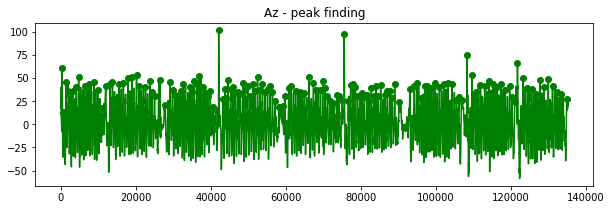

In [683]:
peaks_u2 = get_peaks(ay_u2_f, time_scale, time_millis_u2, distance=600)

In [774]:
# step 2 - create sliding windows centred around the peak

# total no. of readings to take
def generate_windows(dims, time_scale, time_millis, peaks, num_readings=40):
    print(f"window time = {num_readings * time_scale}ms")
    # windows store the az readings for various windows
    windows = []
    window_times = []
    for peak in peaks:
        window, window_time = [], []
        # include half of the readings on either side of the peak
        lower = int(peak - num_readings/2)
        upper = int(peak + num_readings/2)
        # skip windows that are out of bounds
        if lower < 0 or upper >= len(dims[0]):
            print(f"peak at t={time_millis[peak]} has an out of bounds window")
            continue
        # each window is of the format [ ax0, ay0, az0, ax1, ay1, az1, ... , axn, ayn, azn ]
        # consisting of n readings centred around the strike point in the z-axis
        for i in range(lower, upper):
            curr = []
            for dim in dims:
                curr.append(round(dim[i],3))
            window.extend(curr)
            window_time.append(time_millis[i])
        windows.append(window)
        window_times.append(window_time)
    return windows, window_times

def squashed_windows(dims, time_scale, time_millis, peaks, num_readings=40):
    print(f"window time = {num_readings * time_scale}ms")
    # windows store the az readings for various windows
    windows = []
    window_times = []
    for peak in peaks:
        window, window_time = [], []
        # include half of the readings on either side of the peak
        lower = int(peak - num_readings/2)
        upper = int(peak + num_readings/2)
        # skip windows that are out of bounds
        if lower < 0 or upper >= len(dims[0]):
            print(f"peak at t={time_millis[peak]} has an out of bounds window")
            continue
        # each window is of the format [ ax0, ay0, az0, ax1, ay1, az1, ... , axn, ayn, azn ]
        # consisting of n readings centred around the strike point in the z-axis
        instance =  []
        for dim in dims:
            instance.append(np.mean(dim[lower:upper]))
            instance.append(np.median(dim[lower:upper]))
        windows.append(instance)
        window_times.append(time_millis[lower:upper])
    return windows, window_times

windows_u1, _ = generate_windows([ax_u1_f, ay_u1_f, az_u1_f], time_scale, time_millis_u1, peaks_u1, num_readings=20)
windows_u2, _ = generate_windows([ax_u2_f, ay_u2_f, az_u2_f], time_scale, time_millis_u2, peaks_u2, num_readings=20)

print(f"len(windows_u1)={len(windows_u1)}")
print(f"len(windows_u2)={len(windows_u2)}")

window time = 400ms
peak at t=92320 has an out of bounds window
window time = 400ms
len(windows_u1)=87
len(windows_u2)=154


In [775]:
squashed_u1, _ = squashed_windows([gx_u1, gy_u1, gz_u1, total_u1], time_scale, time_millis_u1, peaks_u1, num_readings=20)
squashed_u2, _ = squashed_windows([ gx_u2, gy_u2, gz_u2, total_u2], time_scale, time_millis_u2, peaks_u2, num_readings=20)
print(f"len(squashed_u1)={len(squashed_u1)}")
print(f"len(squashed_u2)={len(squashed_u2)}")

window time = 400ms
peak at t=92320 has an out of bounds window
window time = 400ms
len(squashed_u1)=87
len(squashed_u2)=154


In [776]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def train_and_test(X, y, clf):
    # step 3: split the dataset into training and testing modes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    print(f"len(X_train) = {len(X_train)}")
    print(f"len(X_test) = {len(X_test)}")

    # step 4: train and test a simple SVM classifier
    clf.fit(X_train, y_train)
    print("Training ...")
    plot_confusion_matrix(clf, X_test, y_test)
    plt.title("Classifying U1's gait vs U2's gait")
    plt.show()
    print(f"5-fold cross-val score={np.mean(cross_val_score(clf, X, y, cv=5))}")

len(X_train) = 168
len(X_test) = 73
Training ...


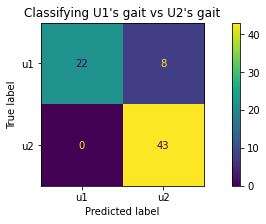

5-fold cross-val score=0.9090136054421769


In [777]:
X = windows_u1 + windows_u2
y = ["u1"] * len(windows_u1) + ["u2"] * len(windows_u2)

# SVM
train_and_test(X, y, svm.SVC())

len(X_train) = 168
len(X_test) = 73
Training ...


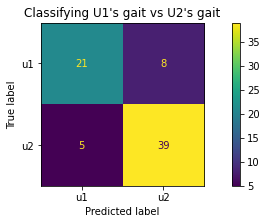

5-fold cross-val score=0.9296768707482993


In [778]:
# kNN
train_and_test(X, y, KNeighborsClassifier(n_neighbors=4))

len(X_train) = 168
len(X_test) = 73
Training ...


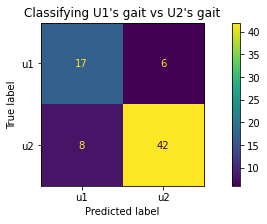

/home/hasaru/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5-fold cross-val score=0.8131802721088434


In [772]:
# logistic regression
train_and_test(X, y, LogisticRegression(max_iter=1000))

len(X_train) = 168
len(X_test) = 73
Training ...


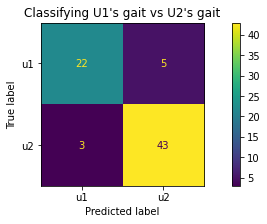

5-fold cross-val score=0.8758503401360545


In [773]:
# random forest classifier
train_and_test(X, y, RandomForestClassifier())

len(X_train) = 168
len(X_test) = 73
Training ...


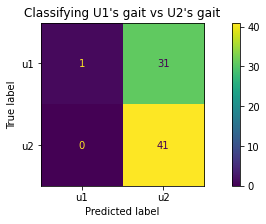

5-fold cross-val score=0.7468537414965987


In [721]:
# repeat steps 3 and 4 for squashed windows
X = squashed_u1 + squashed_u2
y = ["u1"] * len(windows_u1) + ["u2"] * len(windows_u2)
# squashed windows + SVM
train_and_test(X, y, svm.SVC())

len(X_train) = 162
len(X_test) = 70
Training ...


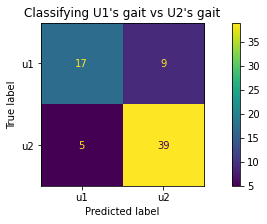

5-fold cross-val score=0.8365402405180389


In [520]:
# squashed windows + KNN
train_and_test(X, y, KNeighborsClassifier(n_neighbors=5))

len(X_train) = 162
len(X_test) = 70
Training ...


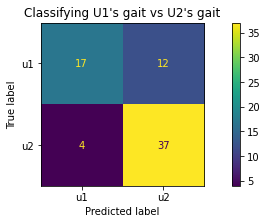

5-fold cross-val score=0.8103607770582795


In [521]:
# squashed windows + logistic regression
train_and_test(X, y, LogisticRegression(max_iter=1000))

len(X_train) = 179
len(X_test) = 78
Training ...


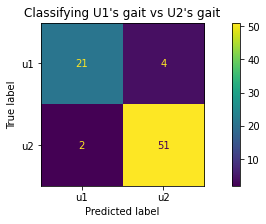

5-fold cross-val score=0.8715686274509803


In [628]:
# squashed windows + random forest classifier
train_and_test(X, y, RandomForestClassifier())

Best cross-validation score: 0.93
Best parameters:  {'n_neighbors': 4}


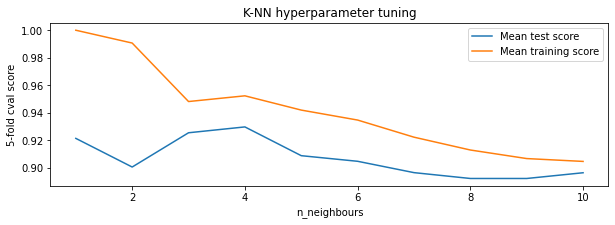

In [798]:
###########################
# Hyperparameter Tuning #
###########################

from sklearn.model_selection import GridSearchCV

param_grid = { 'n_neighbors': list(range(1,11)) }
grid = GridSearchCV(KNeighborsClassifier(), param_grid,
                    cv=5, return_train_score=True)
grid.fit(X, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

n_neighbours = list(range(1,11))

train_scores_mean = grid.cv_results_["mean_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]

plt.figure()
plt.title('K-NN hyperparameter tuning')
plt.xlabel('n_neighbours')
plt.ylabel('5-fold cval score')

# plot train scores
plt.plot(n_neighbours, test_scores_mean, label='Mean test score')
plt.plot(n_neighbours, train_scores_mean, label='Mean training score')
plt.legend(loc='best')
plt.show()